<a href="https://colab.research.google.com/github/holstbone/Neural-Networks-Music-Genres/blob/main/A_4_3B_Crop_and_PreProcess_Train_Test_Valid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
from matplotlib import pyplot
import os
import random
import shutil

In [ ]:
zip_path = '/content/drive/MyDrive/spectrograms3sec/spectrograms3sec.zip'
!cp "{zip_path}" .
!unzip -q spectrograms3sec.zip
!rm spectrograms3sec.zip

In [ ]:
#load image
image = Image.open('/content/spectrograms3sec/blues/blues1.png')


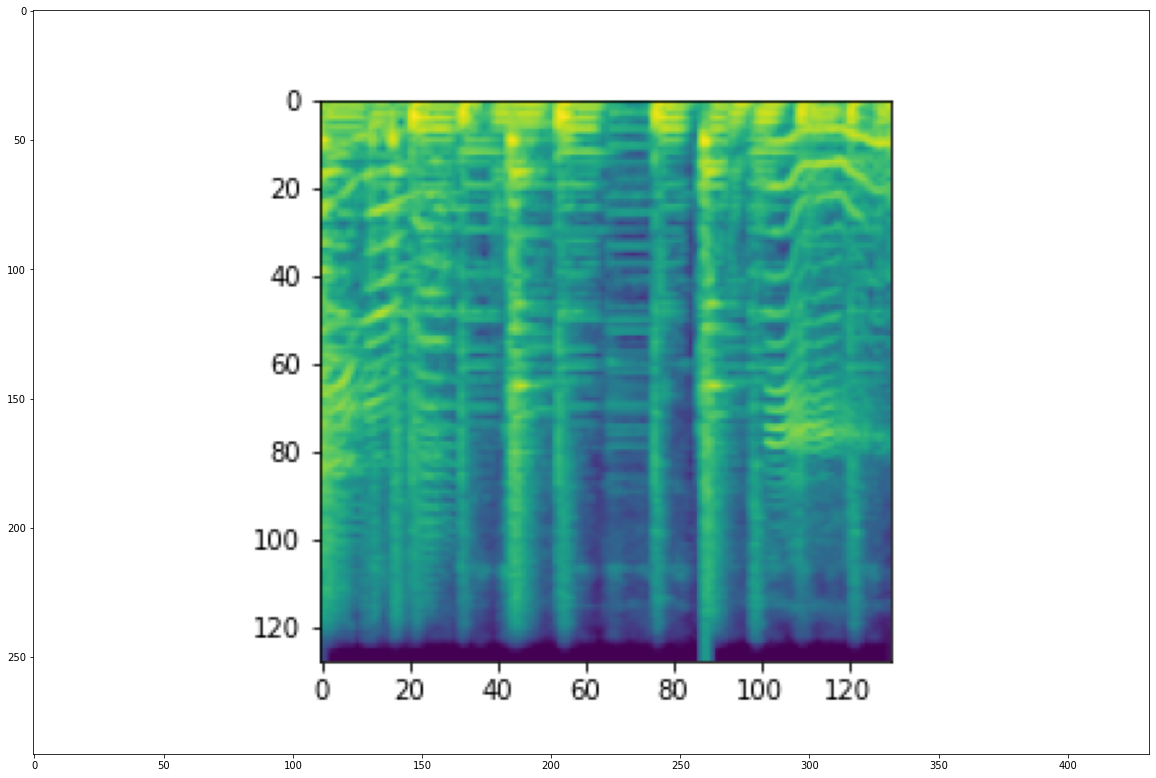

In [ ]:
pyplot.figure(figsize=(20, 20))
pyplot.imshow(image)

In [ ]:
# create a cropped image
cropped = image.crop((112, 36, 112+220, 36+216))

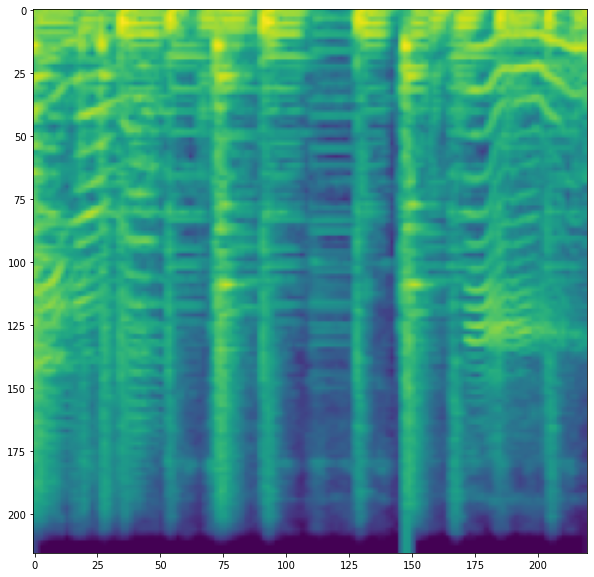

In [ ]:
pyplot.figure(figsize=(10, 10))
pyplot.imshow(cropped)

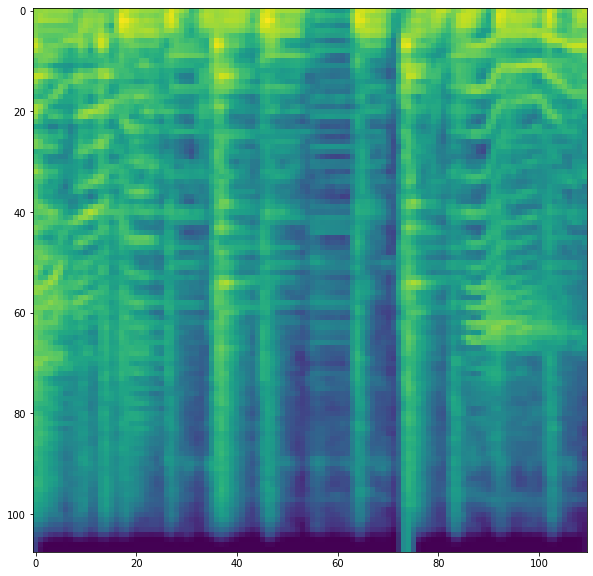

In [ ]:
resized = cropped.resize((110,108))
pyplot.figure(figsize=(10, 10))
pyplot.imshow(resized)

In [ ]:
genres = 'blues classical country disco pop hiphop jazz metal reggae rock'
genres = genres.split()

In [ ]:
for g in genres:
  path1 = os.path.join('/content/data/train',f'{g}')
  os.makedirs(path1)
  path2 = os.path.join('/content/data/test',f'{g}')
  os. makedirs(path2)
  path3 = os.path.join('/content/data/validation',f'{g}')
  os. makedirs(path3)

In [ ]:
#UPDATED CODE: No resizing of images

genres = 'blues classical country disco pop hiphop jazz metal reggae rock'
genres = genres.split()
for g in genres:
  orig_dir = os.path.join('/content/spectrograms3sec/',f'{g}')
  fn = os.listdir(orig_dir)
  random.shuffle(fn)
  train_fn = fn[0:800]
  test_fn = fn[800:900]
  valid_fn = fn[900:]
  print(len(train_fn), len(test_fn), len(valid_fn))
  
  for f in train_fn:
    new_dir = os.path.join('/content/data/train',f'{g}')
    new_image = Image.open(orig_dir+'/'+f)
    new_image = new_image.crop((112, 36, 112+220, 36+216))#.resize((110,108))
    # save as PNG format
    new_image.save(new_dir+'/'+f, format='PNG')

  for f in test_fn:
    new_dir = os.path.join('/content/data/test',f'{g}')
    new_image = Image.open(orig_dir+'/'+f)
    new_image = new_image.crop((112, 36, 112+220, 36+216))#.resize((110,108))
    # save as PNG format
    new_image.save(new_dir+'/'+f, format='PNG')
 
  for f in valid_fn:
    new_dir = os.path.join('/content/data/validation',f'{g}')
    new_image = Image.open(orig_dir+'/'+f)
    new_image = new_image.crop((112, 36, 112+220, 36+216))#.resize((110,108))
    # save as PNG format
    new_image.save(new_dir+'/'+f, format='PNG')

800 100 100
800 100 100
800 100 100
800 100 100
800 100 100
800 100 100
800 100 100
800 100 100
800 100 100
800 100 100


In [ ]:
!zip -q /content/data.zip -r /content/data

In [ ]:
!cp /content/data.zip /content/drive/MyDrive/spectrograms3sec

In [ ]:
# NOTE: This creates an extra /content/ folder which I could not figure out how
#       to eliminate. So, I manually eliminated the /content/ folder
#       in Windows 10.